# Survival Function (S(t))                           |                         Hazard Function S(t)

# 

In [2]:
pip install lifelines

  Obtaining dependency information for lifelines from https://files.pythonhosted.org/packages/b3/98/868d6b60a6a8847a53bca3b15b0e057fb3ed6395e5852f0c0c55bbaaa928/lifelines-0.28.0-py3-none-any.whl.metadata
  Obtaining dependency information for autograd>=1.5 from https://files.pythonhosted.org/packages/81/70/d5c7c2a458b8be96495c8b1634c2155beab58cbe864b7a9a5c06c2e52520/autograd-1.6.2-py3-none-any.whl.metadata
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for formulaic>=0.2.2 from https://files.pythonhosted.org/packages/2c/09/7a9f95d35106d882f79ddabc2d33d8f2a262863f1f5d6fd00f46c5fc90aa/formulaic-1.0.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/349.2 kB ? eta -:--:--
   ---- ---------------------------------- 41.0/349.2 kB 991.0 kB/s eta 0:00:01
   -------------------------- ------------- 235.5/349.2 kB 2.4 MB/s eta 0:00:01
   ---------------------------------------- 349

In [9]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Survival Function 

In [6]:
# Sample data representing survival times
survival_times = [10, 15, 20, 25, 30, 35, 40]

In [7]:
# Fit Kaplan-Meier estimator
kmf = KaplanMeierFitter()
kmf.fit(durations=survival_times)


<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 7 total observations, 0 right-censored observations>

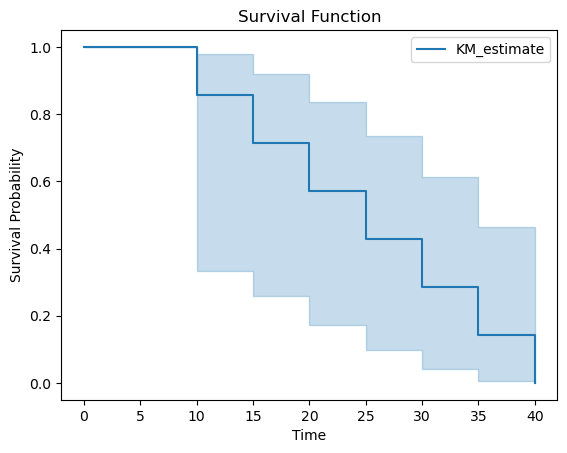

In [8]:

# Plot the survival function
kmf.plot_survival_function()
plt.title('Survival Function')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.show()

# 

In [10]:
# simulated dataset or use an external dataset for survival analysis.

In this example, we simulate two groups (A and B) with different exponential survival times. The event column indicates whether an event (failure) occurred, and the group column distinguishes between the two groups. The Kaplan-Meier estimator is then used to estimate and plot the survival functions for both groups.

In [25]:
# Simulate survival times for two groups
np.random.seed(123)  #t the random numbers generated by NumPy will be the same every time the code is executed.
group_a_survival_times = np.random.exponential(10, 50)  # generates 50 random values from an exponential distribution with a mean (scale parameter) of 10. 
group_b_survival_times = np.random.exponential(15, 50) # Mean =15

In [26]:
# Create a DataFrame
data = pd.DataFrame({
    'time': np.concatenate([group_a_survival_times, group_b_survival_times]),
    'event': [1] * 50 + [0] * 50,  #  creates a list of 50 elements, all with the value 1. This represents events or failures.
    'group': ['A'] * 50 + ['B'] * 50 #  creates another list of 50 elements, all with the value 0. This represents censored data (no event observed).
})

In [27]:
data

,time,event,group
0,11.922721,1,A
1,3.370675,1,A
2,2.572841,1,A
3,8.014337,1,A
4,12.710709,1,A
...,...,...,...
95,17.650317,0,B
96,2.457693,0,B
97,7.634318,0,B
98,4.133455,0,B


<Axes: xlabel='timeline'>

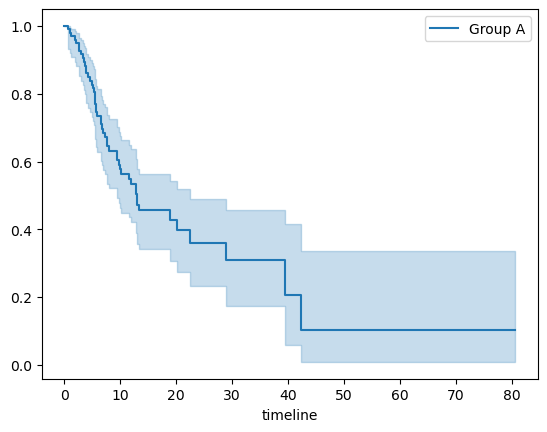

In [15]:
# Fit Kaplan-Meier estimator for each group
kmf = KaplanMeierFitter()
kmf.fit(durations=data['time'], event_observed=data['event'], label='Group A')
kmf.plot_survival_function()

<Axes: xlabel='timeline'>

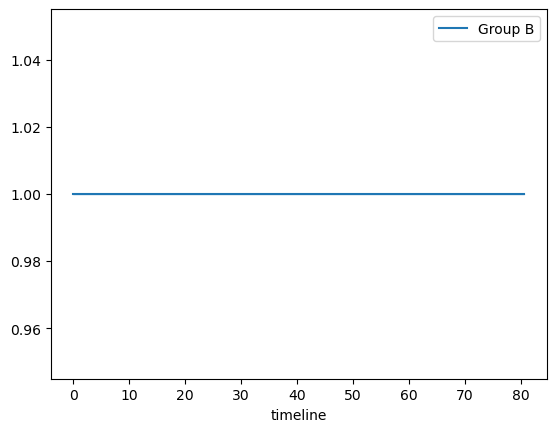

In [16]:
kmf.fit(durations=data[data['group'] == 'B']['time'], event_observed=data[data['group'] == 'B']['event'], label='Group B')
kmf.plot_survival_function()

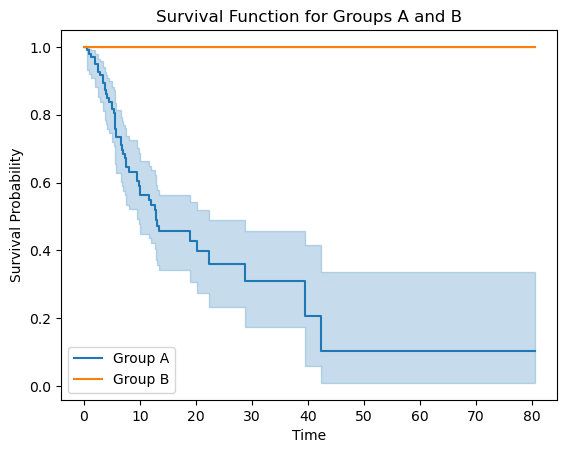

In [29]:
# Fit Kaplan-Meier estimator for each group
kmf = KaplanMeierFitter()
kmf.fit(durations=data['time'], event_observed=data['event'], label='Group A')
kmf.plot_survival_function()

kmf.fit(durations=data[data['group'] == 'B']['time'], event_observed=data[data['group'] == 'B']['event'], label='Group B')
kmf.plot_survival_function()

plt.title('Survival Function for Groups A and B')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend()
plt.show()

## Interpretation  

###  for group A 
At the beginning of the plot (left side), the survival probability is 1. This means that at the start of the observation period, all individuals in 'Group A' are assumed to be alive.

As you move to the right along the x-axis, the curve may start to decline. This decline represents the estimated proportion of individuals experiencing an event (failure) at each time point.

The steeper the decline, the faster the events are occurring, indicating a higher risk of failure.

The endpoint of the curve (far right) represents the overall survival probability at the end of the observation period. The lower the survival probability, the higher the cumulative risk of failure.

Curve for Group B: Similarly, the curve for 'Group B' provides the survival probabilities over time for this group. You can compare the shapes of the two curves to understand how the risk of failure differs between the two groups.

### for group B
If 'Group B' has a consistently higher survival probability, it suggests that individuals in 'Group B' are experiencing events (failures) at a slower rate than those in 'Group A.'

If 'Group B' has a steeper decline, it indicates a higher risk of failure compared to 'Group A' at certain time points.

# 

# Hazard Function  

#### insights into the instantaneous risk of failure (hazard) over time.

In [19]:
from lifelines import NelsonAalenFitter

In [20]:
naf = NelsonAalenFitter()

<Axes: >

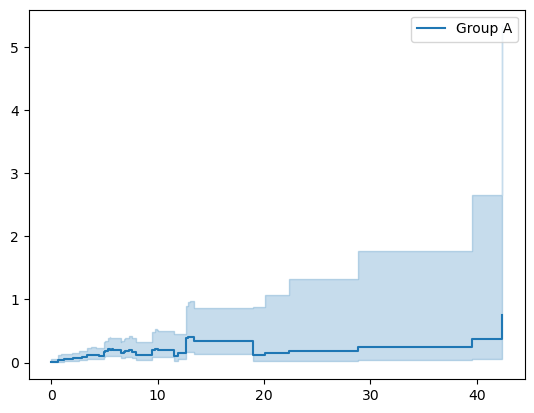

In [32]:
naf.fit(durations=data[data['group'] == 'A']['time'], event_observed=data[data['group'] == 'A']['event'], label='Group A')
naf.plot_hazard(bandwidth=1.0)

<Axes: >

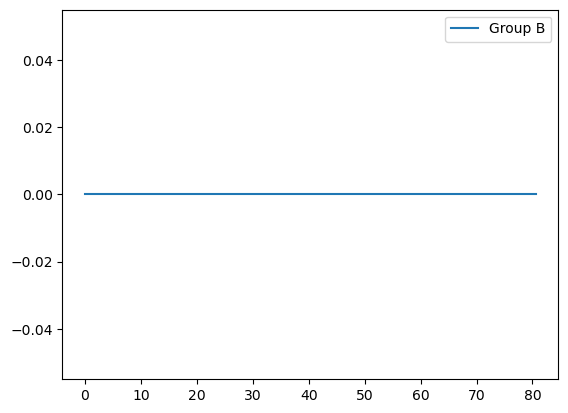

In [23]:
naf.fit(durations=data[data['group'] == 'B']['time'], event_observed=data[data['group'] == 'B']['event'], label='Group B')
naf.plot_hazard(bandwidth=1.0)

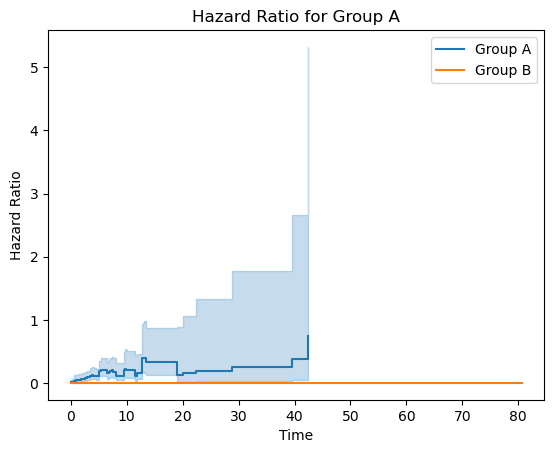

In [35]:
naf.fit(durations=data[data['group'] == 'A']['time'], event_observed=data[data['group'] == 'A']['event'], label='Group A')
naf.plot_hazard(bandwidth=1.0)
naf.fit(durations=data[data['group'] == 'B']['time'], event_observed=data[data['group'] == 'B']['event'], label='Group B')
naf.plot_hazard(bandwidth=1.0)
plt.title('Hazard Ratio for Group A')
plt.xlabel('Time')
plt.ylabel('Hazard Ratio')
plt.show()

In [36]:
# Group A: The curve for Group A represents the estimated hazard function for individuals in Group A. The height of the curve at a specific time reflects the instantaneous risk of failure for individuals in this group at that time.
# Group B: Similarly, the curve for Group B represents the hazard function for individuals in Group B.

### Interpretation:

### Increasing Hazard:
 If the hazard function increases over time, it suggests that the risk of failure is rising. Peaks or sharp increases in the hazard function indicate times when the risk is particularly high.


### Decreasing Hazard:
A decreasing hazard function indicates a declining risk of failure over time.
Comparing Groups: By comparing the hazard functions of Groups A and B, you can observe differences in the risk of failure between the two groups at various time points.

### Censoring Points:  (50,60,70,80)

If there are censored data points (individuals who have not experienced failure until the end of the observation period), they will be reflected in the plot as steps or jumps in the hazard function.

# 

## seaborn for kernel density estimation  

### it doesn't directly estimate the hazard function or the Nelson-Aalen cumulative hazard.



### Keep in mind that while this provides a smooth estimate of the density, it is not equivalent to the Nelson-Aalen cumulative hazard or hazard function

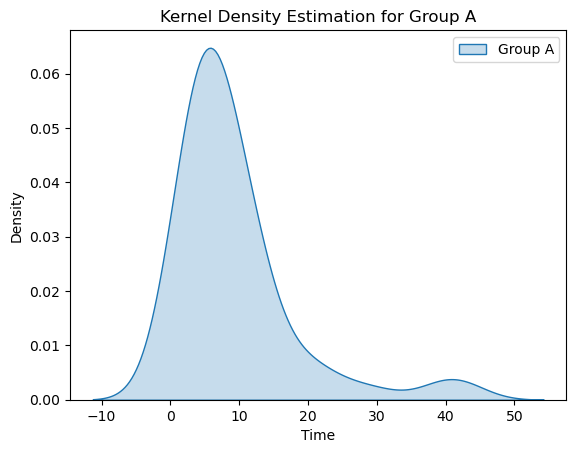

In [34]:
import seaborn as sns 
# Select data for Group A
group_a_data = data[data['group'] == 'A']

# Set the bandwidth for kernel density estimation
bandwidth = 1.0

# Plot KDE for Group A
sns.kdeplot(data=group_a_data['time'], bw_adjust=bandwidth, label='Group A', fill=True)

plt.title('Kernel Density Estimation for Group A')
plt.xlabel('Time')
plt.ylabel('Density')
plt.legend()
plt.show()

#### High-Density Regions:
Peaks in the curve indicate regions where the survival times are more concentrated. This could suggest modes or clusters in the data.

#### Spread and Skewness:
The shape of the curve can provide insights into the spread and skewness of the survival times. A wider curve suggests a broader range of survival times, while asymmetry indicates skewness.

#### Bimodal or Multimodal Distribution:
Multiple peaks in the curve might suggest the presence of different subpopulations with distinct survival characteristics.

#### Tails of the Distribution:
The tails of the curve represent the extreme values of survival times. Longer tails indicate more variability or outliers in the data. 

##### More Concentrated Mean:
The mean of the distribution is often located near the peak or center of the curve. If the curve has a higher peak, it suggests that the mean survival time is more concentrated around that particular value. 

### Higher Peak → More Concentrated Density → Mean Survival Time Concentrated around that Value 

#### Note:
the concept of mean survival time in survival analysis is often discussed in the context of more advanced models like the mean survival time in a parametric survival model or the median survival time. The KDE plot, by itself, doesn't provide the exact mean survival time but can give you a visual sense of where the density of survival times is highest. 

# 

## Kernel Density Estimation (KDE)
#### is a non-parametric method for estimating the probability density function (PDF) of a continuous random variable. In the context of survival analysis or time-to-event data, KDE can be used to visualize the distribution of survival times. Here's a brief explanation of KDE:

##### Objective: The goal of KDE is to estimate the underlying probability density of a dataset without assuming a specific parametric distribution.

#####  Kernel Function: The method involves placing a kernel (a smooth, symmetric, and non-negative function) at each data point and summing them to obtain a smooth estimate of the PDF.

##### Bandwidth: The bandwidth parameter controls the width of the kernel and influences the smoothness of the resulting KDE. 

#### A larger bandwidth results in a smoother estimate but might oversmooth and hide important features, while a smaller bandwidth may capture more details but be sensitive to noise. 

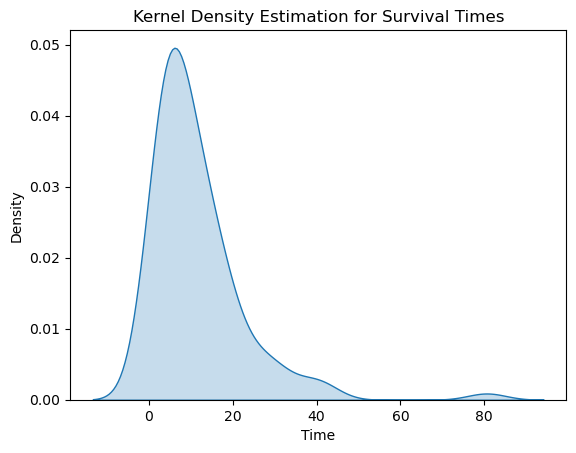

In [37]:
sns.kdeplot(data=data['time'], fill=True)
plt.title('Kernel Density Estimation for Survival Times')
plt.xlabel('Time')
plt.ylabel('Density')
plt.show()